In [2]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [3]:
from Bio.Seq import Seq

In [ ]:
dnaM = Seq('ATGGCCATTGTAATGGGCCGT')

In [ ]:
dnaM

Seq('ATGGCCATTGTAATGGGCCGT')

In [ ]:
dnaC = dnaM.complement()

In [ ]:
dnaC

Seq('TACCGGTAACATTACCCGGCA')

In [ ]:
print(dnaM)
print(dnaC)


ATGGCCATTGTAATGGGCCGT
TACCGGTAACATTACCCGGCA


In [ ]:
rnaMen = dnaC.transcribe()

In [ ]:
rnaMen

Seq('UACCGGUAACAUUACCCGGCA')

In [ ]:
print(dnaM)
print(dnaC)
print(rnaMen)

ATGGCCATTGTAATGGGCCGT
TACCGGTAACATTACCCGGCA
UACCGGUAACAUUACCCGGCA


In [ ]:
prot = rnaMen.translate()

In [ ]:
prot

Seq('YR*HYPA')

In [ ]:
prot = rnaMen.translate(to_stop=False, table=1)
prot

Seq('YR*HYPA')

In [ ]:
prot = rnaMen.translate(to_stop=False, table=11)
prot

Seq('YR*HYPA')

In [4]:
from Bio import pairwise2

In [ ]:
seq1 = Seq('ATGGCCATTGTAATGGGCCGT')
seq2 = Seq('ATCATTGTAATGAACCGT')

In [ ]:
align = pairwise2.align.globalxx(seq1, seq2)

In [ ]:
print(pairwise2.format_alignment(*align[-1]))

ATGGCCATTGTAATG-GGCCGT
||  | ||||||||| . ||||
AT--C-ATTGTAATGAA-CCGT
  Score=16



In [ ]:
align2 = pairwise2.align.globalms(seq1, seq2, 5, -4, -2, -0.5)

In [ ]:
print(pairwise2.format_alignment(*align2[0]))

ATGGCCATTGTAATGGG--CCGT
||   |||||||||  |  ||||
AT---CATTGTAAT--GAACCGT
  Score=72



Importar dados NCBI

In [5]:
from Bio import Entrez
from Bio import SeqIO

In [6]:
Entrez.email = "guilherme@sclab.com.br"
handle = Entrez.esearch(db='nucleotide', term='SARS-CoV-2 human', retmax='10')
record = Entrez.read(handle)

In [7]:
record['IdList']

['2282816784', '2282785922', '2282785920', '2282785918', '2282785916', '2282785914', '2282785912', '2282785910', '2282785908', '2282785906']

In [8]:
seq_handle = Entrez.efetch(db='nucleotide', rettype='fasta', id=record['IdList'])

In [9]:
seq_record = SeqIO.parse(seq_handle, 'fasta')

In [10]:
seq_record

In [11]:
SeqIO.write(seq_record, 'covHuman_10.fasta', 'fasta')

10

In [14]:
seqs = []

with open('covHuman_10.fasta', 'r') as fasta_file:
  for s in SeqIO.parse(fasta_file, 'fasta'):
    seqs.append(s)

In [42]:
seqs

[SeqRecord(seq=Seq('AGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCAC...CAT'), id='OP164535.1', name='OP164535.1', description='OP164535.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/IRQ/IQ-4 AL-Diwanyah/2021 surface glycoprotein (S) gene, partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTT...TAA'), id='OP164420.1', name='OP164420.1', description='OP164420.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/TWN/CGMH-CGU-248/2022 surface glycoprotein (S) gene, complete cds', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTT...TAA'), id='OP164419.1', name='OP164419.1', description='OP164419.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/TWN/CGMH-CGU-247/2022 surface glycoprotein (S) gene, complete cds', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTT...TAA'), id='OP164418.1', na

In [22]:
seqs[0].seq

Seq('AGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCAC...CAT')

In [27]:
seqs[0].id

'OP164535.1'

In [28]:
seqs[0].description

'OP164535.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/IRQ/IQ-4 AL-Diwanyah/2021 surface glycoprotein (S) gene, partial cds'

In [34]:
seqs[0].seq.transcribe().translate(table=11)

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('RNKYF*PGCCSLSGC*LHRSPCCYSCRSTYSYLACLFYRF*CFSNTCRLFNRG*...QEV')

In [35]:
seqs[0].seq.transcribe().translate(table=1)

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('RNKYF*PGCCSLSGC*LHRSPCCYSCRSTYSYLACLFYRF*CFSNTCRLFNRG*...QEV')

In [36]:
from Bio.SeqUtils import GC

In [66]:
ids = []
gcs = []
ids_gcs = []

for s in seqs:
  ids.append(s.id)
  gcs.append( GC(s.seq) )

  ids_gcs.append( s.id + ' ' + str(GC(s.seq)) )

  # if s.id == 'OP164417.1':
  #   break

In [64]:
import matplotlib.pyplot as plt

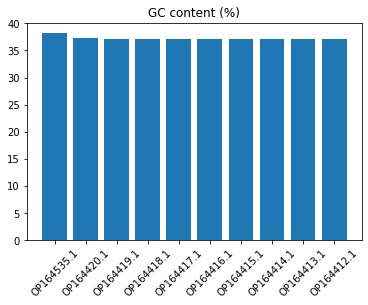

In [70]:
plt.bar(ids, gcs)
plt.xticks(rotation = 45)
plt.title('GC content (%)')
plt.show()

In [71]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.1 MB/s 
     |████████████████████████████████| 357 kB 54.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=6b5949d2485c4c816fa2455741df9dd72ebf0953deaf487346a2064324cb5f95
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [72]:
import plotly.express as px

In [73]:
fig = px.bar(x=ids, y=gcs)
fig.show()


NCBI - GenBank
---



In [88]:
seq_handle = Entrez.efetch(db='nucleotide', rettype='gb', id='45478711')

In [89]:
seq_record = SeqIO.parse(seq_handle, 'gb')

In [90]:
SeqIO.write(seq_record, 'NC_005816.gb', 'gb')

1

In [91]:
with open('NC_005816.gb', 'r') as gb_file:
  gb = SeqIO.read(gb_file, 'gb')
  # for s in SeqIO.parse(gb_file, 'gb'):
  #   print(s)

In [93]:
gb

SeqRecord(seq=Seq(None, length=9609), id='NC_005816.1', name='NC_005816', description='Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence', dbxrefs=['BioProject:PRJNA224116', 'BioSample:SAMN02602970', 'Assembly:GCF_000007885.1'])

In [94]:
from Bio import SeqIO
from Bio.KEGG import REST

In [95]:
result = REST.kegg_info("kegg").read()

In [97]:
print(result)

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 103.0+/08-10, Aug 22
                 Kanehisa Laboratories
                 pathway     949,934 entries
                 brite       322,345 entries
                 module          536 entries
                 orthology    25,293 entries
                 genome       20,149 entries
                 genes     42,949,938 entries
                 compound     18,962 entries
                 glycan       11,087 entries
                 reaction     11,802 entries
                 rclass        3,180 entries
                 enzyme        8,005 entries
                 network       1,375 entries
                 variant         458 entries
                 disease       2,577 entries
                 drug         11,938 entries
                 dgroup        2,398 entries



In [98]:
result = REST.kegg_info("pathway").read()

In [99]:
print(result)

pathway          KEGG Pathway Database
path             Release 103.0+/08-10, Aug 22
                 Kanehisa Laboratories
                 949,934 entries

linked db        module
                 ko
                 <org>
                 genome
                 compound
                 glycan
                 reaction
                 rclass
                 enzyme
                 network
                 disease
                 drug
                 pubmed



In [105]:
result = REST.kegg_find("disease", "covid").read()

In [106]:
print(result)

ds:H02398	COVID-19; Coronavirus disease 2019



In [107]:
result = REST.kegg_find("compound", "Glutathione").read()

In [109]:
print(result)

cpd:C00051	Glutathione; 5-L-Glutamyl-L-cysteinylglycine; N-(N-gamma-L-Glutamyl-L-cysteinyl)glycine; gamma-L-Glutamyl-L-cysteinyl-glycine; GSH; Reduced glutathione
cpd:C00127	Glutathione disulfide; GSSG; Oxiglutatione; Oxidized glutathione
cpd:C00920	CoA-glutathione; Coenzyme A-glutathione mixed disulfide
cpd:C01031	S-Formylglutathione
cpd:C02320	R-S-Glutathione
cpd:C02589	S-Acylglutathione
cpd:C02886	S-Hexyl-glutathione; S-Hexyl-L-glutathione
cpd:C03174	S-Succinylglutathione
cpd:C03451	(R)-S-Lactoylglutathione; S-D-Lactoylglutathione
cpd:C03899	S-(2-Hydroxyacyl)glutathione
cpd:C03928	3-Phosphoglycerol-glutathione
cpd:C04572	S-(N-Hydroxy-N-methylcarbamoyl)glutathione
cpd:C11175	S-(2,4-Dinitrophenyl)glutathione
cpd:C11302	S-Octyl GSH; S-Octyl glutathione
cpd:C11303	S-Decyl GSH; S-Decyl glutathione
cpd:C11304	S-(PGA1)-glutathione
cpd:C11315	S-(4-Azidophenacyl)glutathione; S-(p-Azidophenacyl)glutathione
cpd:C11347	S-Methyl GSH; S-Methylglutathione
cpd:C11367	GSH-prostaglandin A1; Glutathio

In [110]:
result = REST.kegg_get("cpd:C00051").read()

In [112]:
print(result)

ENTRY       C00051                      Compound
NAME        Glutathione;
            5-L-Glutamyl-L-cysteinylglycine;
            N-(N-gamma-L-Glutamyl-L-cysteinyl)glycine;
            gamma-L-Glutamyl-L-cysteinyl-glycine;
            GSH;
            Reduced glutathione
FORMULA     C10H17N3O6S
EXACT_MASS  307.0838
MOL_WEIGHT  307.3235
REMARK      Same as: D00014
REACTION    R00094 R00115 R00120 R00274 R00494 R00497 R00499 R00527 
            R00547 R00900 R01108 R01109 R01110 R01111 R01113 R01262 
            R01292 R01736 R01875 R01917 R01918 R02530 R02824 R03059 
            R03082 R03167 R03522 R03822 R03915 R03956 R03984 R04039 
            R04090 R04860 R05267 R05269 R05402 R05403 R05714 R05717 
            R05748 R06982 R07002 R07003 R07004 R07023 R07024 R07025 
            R07026 R07034 R07035 R07069 R07070 R07083 R07084 R07091 
            R07092 R07093 R07094 R07100 R07113 R07116 R07124 R08280 
            R08350 R08351 R08352 R08353 R08354 R08355 R08511 R08512 
            

In [125]:
result = REST.kegg_get("cpd:C00051", "image").read()

In [127]:
print(result)

b'GIF87a\x02\x01p\x00\xe7\x00\x00\x00\x00\x00\xaf\xaf\xaf\xab\xab\xab\xa9\xa9\xa9\x9f\x9f\x9f\x9d\x9d\x9d\x99\x99\x99\x97\x97\x97\x91\x91\x91\x8d\x8d\x8d\x8b\x8b\x8b\x83\x83\x83\x81\x81\x81\x7f\x7f\x7f{{{yyyuuusssqqqkkkccc___YYY\xfe\xfe\xfe\xfc\xfc\xfcIII\xfa\xfa\xfa\xf8\xf8\xf8EEE\xf6\xf6\xf6CCCAAA\xf2\xf2\xf2===;;;\xec\xec\xec\xea\xea\xea777\xe8\xe8\xe8555\xe6\xe6\xe6333\xe4\xe4\xe4111\xe2\xe2\xe2///---\xde\xde\xde+++\xdc\xdc\xdc)))\xda\xda\xda\'\'\'\xd8\xd8\xd8\xd6\xd6\xd6###!!!\xd2\xd2\xd2\x1f\x1f\x1f\xd0\xd0\xd0\x1b\x1b\x1b\xcc\xcc\xcc\x19\x19\x19\xca\xca\xca\x17\x17\x17\xc8\xc8\xc8\x15\x15\x15\xc6\xc6\xc6\x13\x13\x13\x11\x11\x11\xc0\xc0\xc0\r\r\r\xbe\xbe\xbe\x0b\x0b\x0b\t\t\t\xba\xba\xba\x07\x07\x07\x05\x05\x05\xb6\xb6\xb6\x03\x03\x03\xb4\xb4\xb4\x01\x01\x01\xb0\xb0\xb0\xae\xae\xae\xa6\xa6\xa6\xa4\xa4\xa4\xa2\xa2\xa2\xa0\xa0\xa0\x9c\x9c\x9c\x98\x98\x98\x92\x92\x92\x90\x90\x90\x8e\x8e\x8e\x8c\x8c\x8c\x8a\x8a\x8a\x88\x88\x88\x86\x86\x86\x84\x84\x84\x80\x80\x80~~~|||xxxvvvtttrrrpppn

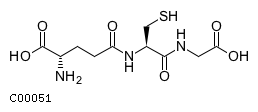

In [126]:
Image(result)

In [118]:
result = REST.kegg_find("pathway", "Fatty+acid+biosynthesis").read()

In [119]:
print(result)

path:map00061	Fatty acid biosynthesis
path:map01040	Biosynthesis of unsaturated fatty acids



In [120]:
result = REST.kegg_get("map00061", "image").read()

In [123]:
from IPython.display import Image

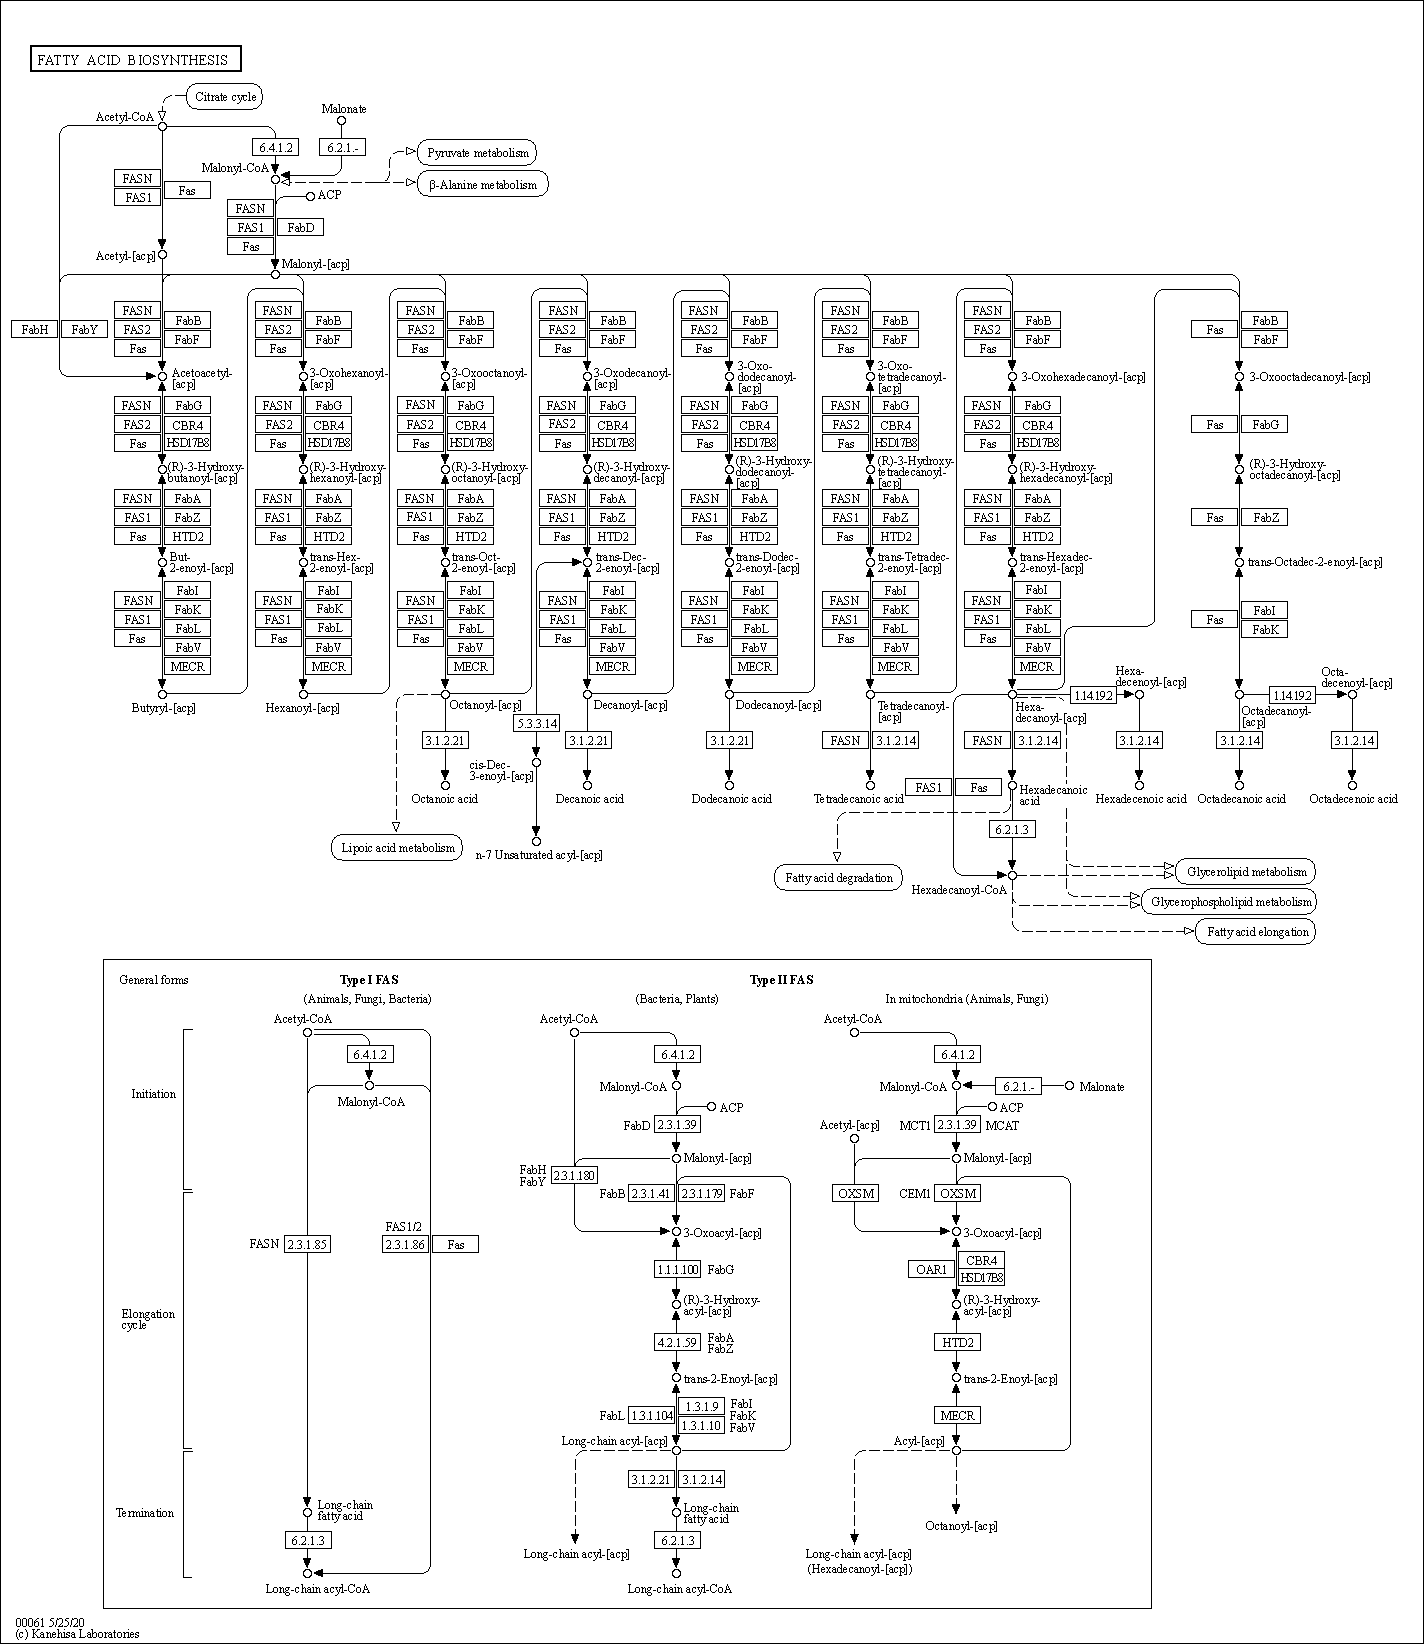

In [124]:
Image(result)

In [ ]:
seqs = []
with open('covHuman_10.fasta', 'r') as fasta_file:
  for s in SeqIO.parse(fasta_file, 'fasta'):
    seqs.append(s)

SeqRecord(seq=Seq('AGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCAC...CAT'), id='OP164535.1', name='OP164535.1', description='OP164535.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/IRQ/IQ-4 AL-Diwanyah/2021 surface glycoprotein (S) gene, partial cds', dbxrefs=[])

In [ ]:
seqs[0].seq.transcribe().translate()

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('RNKYF*PGCCSLSGC*LHRSPCCYSCRSTYSYLACLFYRF*CFSNTCRLFNRG*...QEV')

In [ ]:
from Bio.SeqUtils import GC

In [ ]:
ids = []
gcs = []
for s in seqs:
  ids.append(s.id)
  gcs.append( GC(s.seq) )

In [ ]:
ids

['OP164535.1',
 'OP164420.1',
 'OP164419.1',
 'OP164418.1',
 'OP164417.1',
 'OP164416.1',
 'OP164415.1',
 'OP164414.1',
 'OP164413.1',
 'OP164412.1']

In [ ]:
gcs

[38.15384615384615,
 37.188565434041436,
 37.16233936532914,
 37.16233936532914,
 37.16233936532914,
 37.16233936532914,
 37.16233936532914,
 37.16233936532914,
 37.16233936532914,
 37.16233936532914]

In [ ]:
import matplotlib.pyplot as plt

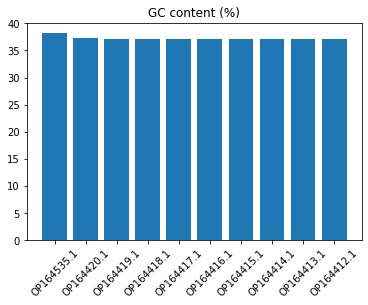

In [ ]:
plt.bar(ids, gcs)
plt.xticks(rotation = 45)
plt.title('GC content (%)')
plt.show()

In [ ]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.9 MB/s 
     |████████████████████████████████| 357 kB 56.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=80d784eddf0ed757b7432bacf5fe1457a2a8c6bff2f3845dd9852f82545af19a
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import plotly.express as px
fig = px.bar(x=ids, y=gcs)
fig.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
X = df[['radius_mean', 'texture_mean']].values

In [ ]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = df[['radius_mean', 'texture_mean', 'compactness_mean', 'concave points_mean']].values
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

In [ ]:
import seaborn as sns

In [ ]:
df_pc = pd.DataFrame(X_pca)

In [ ]:
df_pc['diagnosis'] = df['diagnosis']

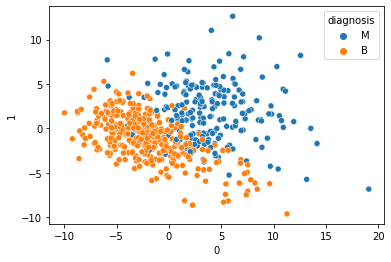

In [ ]:
sns.scatterplot(x=0, y=1, data=df_pc, hue='diagnosis')